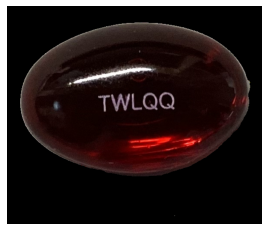

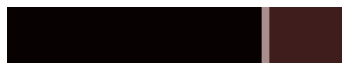

[62, 29, 28]
빨강 계열


In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import easydict
from collections import OrderedDict

def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)

	# normalize the histogram, such that it sums to one
	hist = hist.astype("float")
	hist /= hist.sum()

	# return the histogram
	return hist

def plot_colors(hist, centroids):
	# initialize the bar chart representing the relative frequency
	# of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0

	# loop over the percentage of each cluster and the color of
	# each cluster
	for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
			color.astype("uint8").tolist(), -1)
		startX = endX
	
	# return the bar chart
	return bar

def second_largest_number(arr):
    unique_nums = set(arr)
    sorted_nums = sorted(unique_nums, reverse=True)
    return sorted_nums[1]

args = easydict.EasyDict({
        "image": True,
        "clusters": 3
})

image = cv2.imread('/content/타원1-removebg-preview.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure()
plt.axis("off")
plt.imshow(image)

# reshape the image to be a list of pixels
image = image.reshape((image.shape[0] * image.shape[1], 3))

# cluster the pixel intensities
clt = KMeans(n_clusters = args["clusters"])
clt.fit(image)

# build a histogram of clusters and then create a figure
# representing the number of pixels labeled to each color
hist = centroid_histogram(clt)
bar = plot_colors(hist, clt.cluster_centers_)

# show our color bart
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

temp = clt.cluster_centers_
color_value = temp.astype("uint8").tolist() #세 컬러의 rgb값
second_num = second_largest_number(hist) #히스토그램에서 두 번째로 큰 값(두 번째 색)

for i in range(3): #두 번째로 큰 값의 인덱스를 구함
  if (second_num == hist[i]):
    color_idx = i

print(color_value[color_idx])

if (color_value[color_idx][0] > 190) and (color_value[color_idx][1] > 190) and (color_value[color_idx][2] > 190):
  print("하양")
elif (color_value[color_idx][0] < 50) and (color_value[color_idx][1] < 50) and (color_value[color_idx][2] < 50):
  print("검정")
elif (abs(color_value[color_idx][0] - color_value[color_idx][1]) < 20) and (abs(color_value[color_idx][0] - color_value[color_idx][1]) < abs(color_value[color_idx][1] - color_value[color_idx][2])):
	print("노랑")
elif (abs(color_value[color_idx][0] - color_value[color_idx][2]) < 20):
	print("분홍")
elif (color_value[color_idx][0] > color_value[color_idx][1]) and (color_value[color_idx][0] > color_value[color_idx][2]):
  print("빨강 계열")
elif (color_value[color_idx][1] > color_value[color_idx][0]) and (color_value[color_idx][1] > color_value[color_idx][2]):
  print("녹색 계열")
elif (color_value[color_idx][2] > color_value[color_idx][0]) and (color_value[color_idx][2] > color_value[color_idx][1]):
  print("파랑 계열")